In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('data/abalone.csv')

In [4]:
df.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


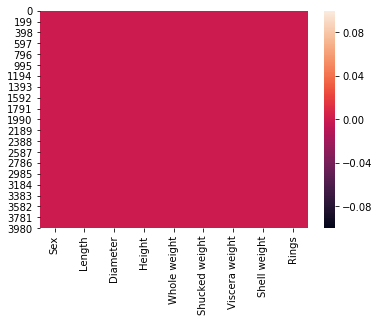

In [10]:
sns.heatmap(df.isnull())

In [12]:
print(df.skew())
print(df.kurtosis())

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64
Length             0.064621
Diameter          -0.045476
Height            76.025509
Whole weight      -0.023644
Shucked weight     0.595124
Viscera weight     0.084012
Shell weight       0.531926
Rings              2.330687
dtype: float64


In [13]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [14]:
df['Sex']=pd.Categorical(df['Sex'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd736976890>,
      dtype=object)

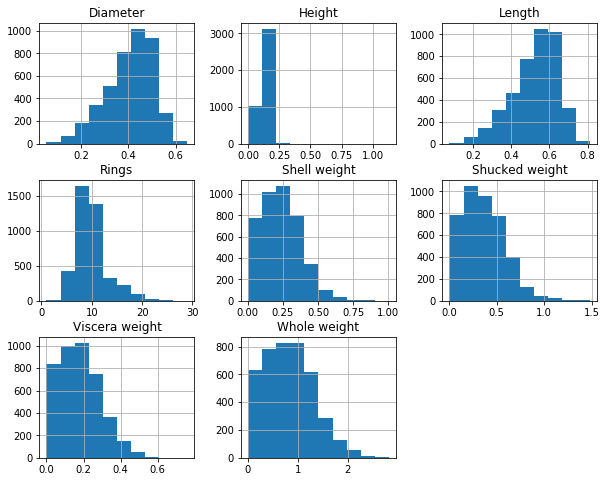

In [15]:
df.hist(figsize=[10,8])

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd72bf2d850>


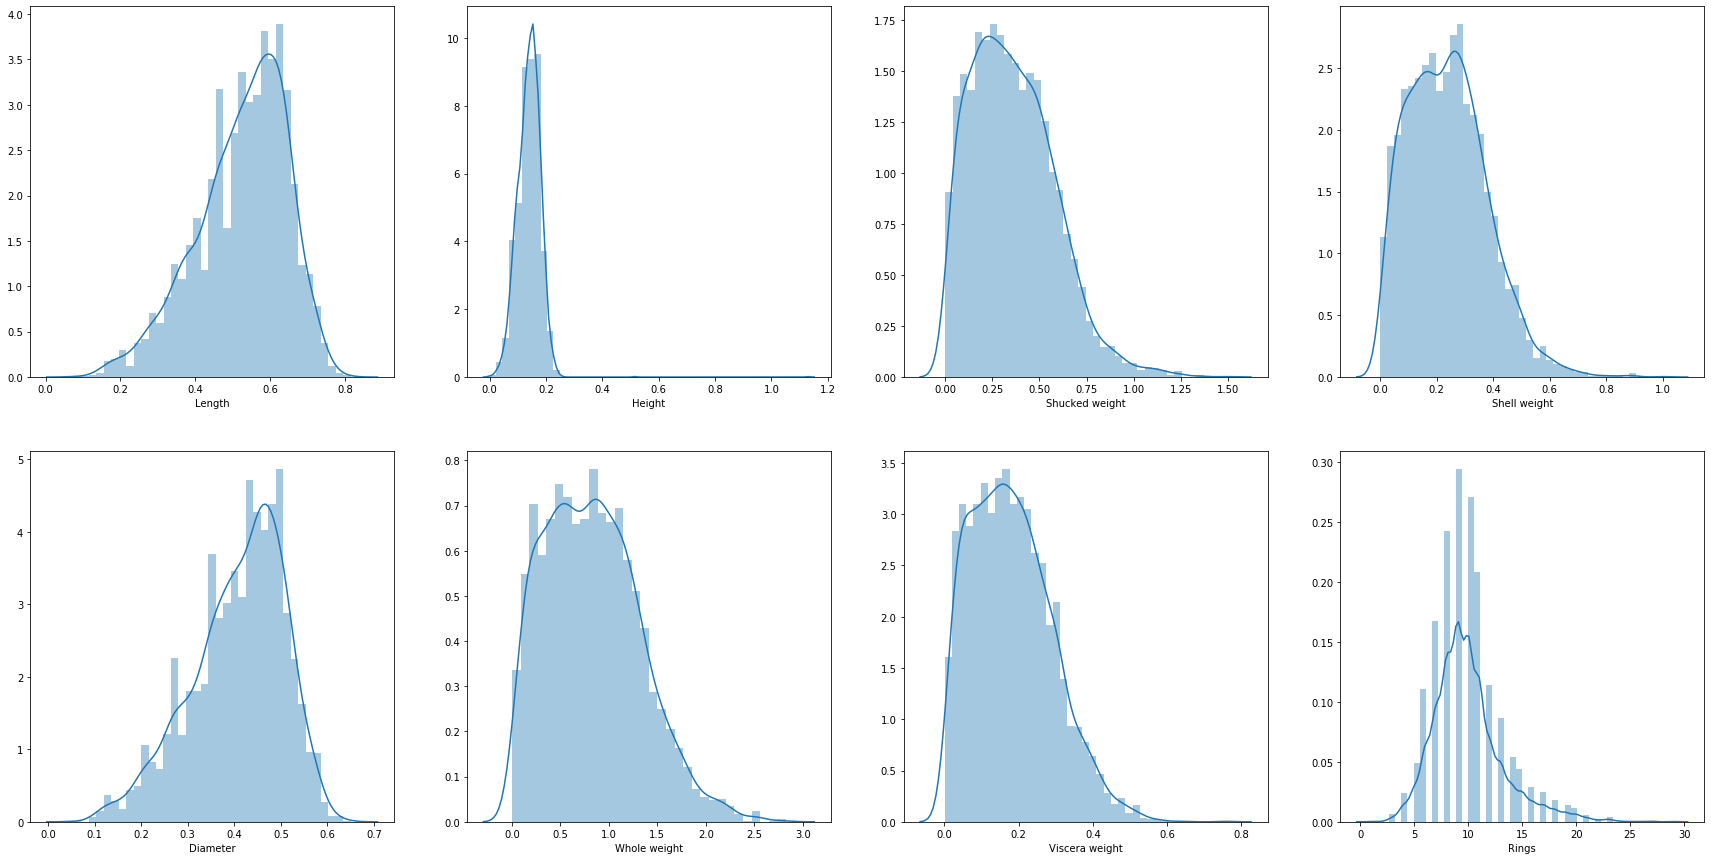

In [61]:
df1=df.drop('Sex',axis=1)
fig, axes = plt.subplots(nrows=2,ncols=4, figsize=(30,15))
print(axes)
for i,column in enumerate(df1.columns):
    sns.distplot(df1[column],ax=axes[i%2,i//2])

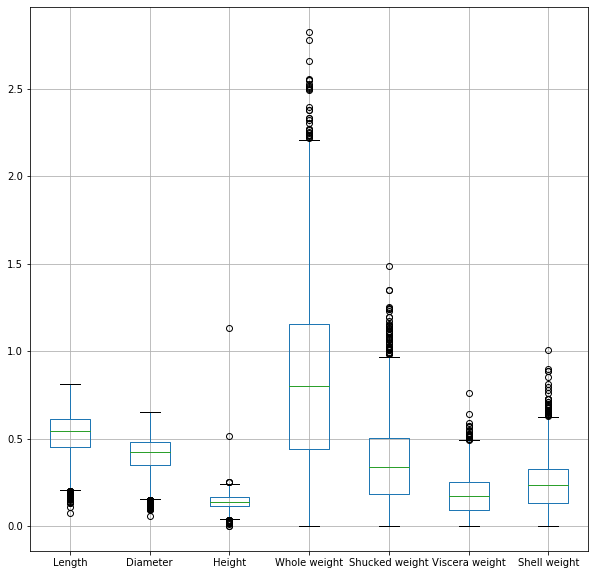

In [62]:
df.drop('Rings',axis=1).boxplot(figsize=[10,10])

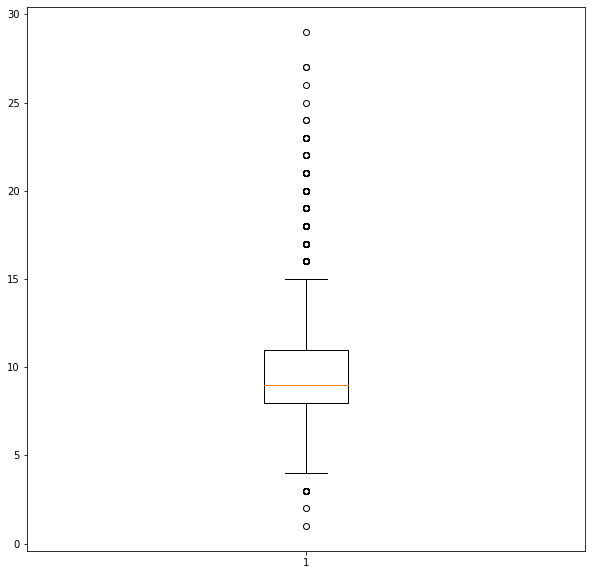

In [17]:
fig, ax = plt.subplots(figsize=[10,10])
ax.boxplot(df['Rings'])
plt.show()

## model training

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve,auc,roc_auc_score

In [147]:
x=df.drop('Sex',axis=1)
y=label_binarize(df['Sex'],classes=['M','F','I'])
n_classes=y.shape[1]

In [148]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [149]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3341, 8), (836, 8), (3341, 3), (836, 3))

In [150]:
clf=OneVsRestClassifier(LogisticRegression(solver='lbfgs',multi_class='multinomial'))

In [159]:
clf.fit(x_train,y_train)
y_score=clf.decision_function(x_test)
y_score

array([[-0.29505537, -0.12593319, -1.20308547],
       [-0.33984262, -0.32004746, -0.51291947],
       [-0.17702461,  0.03473053, -1.57790696],
       ...,
       [-0.28558864, -0.40235498, -0.43401005],
       [-0.47283003, -0.7627412 , -0.02557689],
       [-0.65182691, -1.06368577,  0.61365468]])

In [161]:
fpr=dict()
tpr=dict()
roc_auc=dict()
for i in range(n_classes):
    fpr[i],tpr[i],_=roc_curve(y_test[:,i],y_score[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])

In [166]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

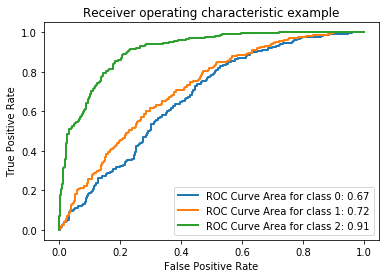

In [172]:
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i],tpr[i],lw=2,label='ROC Curve Area for class {0}: {1:0.2f}'''.format(i,roc_auc[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test,df1))

              precision    recall  f1-score   support

           F       0.50      0.32      0.39       262
           I       0.68      0.85      0.75       267
           M       0.50      0.55      0.52       307

    accuracy                           0.57       836
   macro avg       0.56      0.57      0.56       836
weighted avg       0.56      0.57      0.55       836



In [74]:
from sklearn import metrics
cd=metrics.confusion_matrix(y_test,df1)

[[ 83  43 136]
 [  8 226  33]
 [ 75  63 169]]


In [80]:
print(y_test.value_counts())
print(pd.value_counts(df1))

M    307
I    267
F    262
Name: Sex, dtype: int64
M    338
I    332
F    166
dtype: int64


Text(0.5, 192.0, 'Predicted')

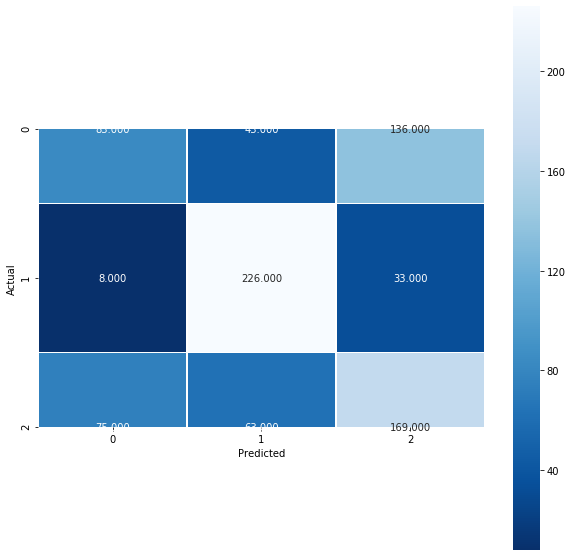

In [81]:
plt.figure(figsize=(10,10))
sns.heatmap(cd,annot=True,fmt=".3f", linewidths=.5, square = True,cmap = 'Blues_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')

## Model saving

In [ ]:
from sklearn.externals import joblib

In [ ]:
PATH_MODEL = './model/clf_saved.sav'
joblib.dump(clf,PATH_MODEL)

In [ ]:
# model loading
clf_loaded = joblib.load(PATH_MODEL)

In [ ]:
clf_loaded.predict(x_test)